In [1]:
from conv_reproj import match
from align_and_diff import a_d
from header_setup import read

from matplotlib import pyplot as plt
import numpy as np

from astropy.io import fits
from pm import pm_correct
from astropy import units as u
from astropy.wcs import WCS
import cmasher as cmr

from astropy.time import Time
from astropy.coordinates import SkyCoord
from everything import full_analysis
from radial import radial_read
from dens import density_model
from everything import plot_1d, plot_2d
import os


Match function imported.
running
Ready to go!


In [3]:
cd

/Users/iman


In [4]:
hr = 'Documents/cuny_ms/jan29_data/from_server/Betelgeuse_TE_cont_R0.image.image.tt0.fits'
lr = 'Documents/cuny_ms/jan29_data/from_server/Betelgeuse_all_cont_1-1.image.image.tt0.fits'


data3, data_1d3, radius3, data_dens_1d3, data_dens_2d3, data_plot3, info3 = full_analysis(hr,lr)
# this should be lr
info3['lr']['kspatres']
# this should be hr

indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

False
First epoch shifted to second.
Header information imported.
Header information imported.


indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

Alignment and subtraction complete. Info dictionaries imported.


/Users/iman/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/iman/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/iman/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/iman/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/iman/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/iman/anaconda3/lib/python3.11/site-packages/numpy

0.040566339161841755

In [5]:
from everything import plot_1d, plot_1d_err,plot_1d_skip

In [27]:
data3['hr']['jy_arc2']

<Quantity [[[[ 1.1542705e-04,  9.4390743e-05,  1.1682197e-04, ...,
               3.1539553e-04,  2.3495250e-04,  1.6631380e-04],
             [-1.4688607e-04, -1.8732033e-04, -1.5860552e-04, ...,
               2.0227092e-04,  6.7119814e-05, -5.4978354e-05],
             [-3.4951250e-04, -4.0019615e-04, -3.5750942e-04, ...,
               1.3622429e-04, -5.3136719e-05, -2.2438109e-04],
             ...,
             [ 9.0185204e-04,  9.4894256e-04,  1.0041971e-03, ...,
               8.4979431e-04,  8.4799522e-04,  8.6654653e-04],
             [ 6.6110457e-04,  6.9305062e-04,  7.3572097e-04, ...,
               6.4275088e-04,  6.3129648e-04,  6.3935964e-04],
             [ 3.9465414e-04,  4.0061149e-04,  4.2906214e-04, ...,
               4.6277646e-04,  4.2587140e-04,  4.0402281e-04]]]]>

# Radial Interpolation

## finding the center

In [41]:
print(np.where(data3['hr']['jy_arc2']==np.nanmax(data3['hr']['jy_arc2'])))
print(np.where(data3['lr']['jy_arc2']==np.nanmax(data3['lr']['jy_arc2'])))
print(np.where(data3['csm']['jy_arc2']==np.nanmax(data3['csm']['jy_arc2'])))

(array([0]), array([0]), array([150]), array([144]))
(array([0]), array([0]), array([499]), array([499]))
(array([509]), array([476]))


In [44]:
data3['csm']['jy_arc2'][np.where(data3['csm']['jy_arc2']==np.nanmax(data3['csm']['jy_arc2']))]

<Quantity [0.0176044]>

In [42]:
#hr
print(np.nanmax(data3['hr']['jy_arc2'])==data3['hr']['jy_arc2'][0,0,150,144])

#lr
print(np.nanmax(data3['lr']['jy_arc2'])==data3['lr']['jy_arc2'][0,0,499,499])

#csm
print(np.nanmax(data3['csm']['jy_arc2'])==data3['csm']['jy_arc2'][509,476])

True
True
True


In [72]:
centers = {'hr': np.where(data3['hr']['jy_arc2'][0,0,...]==np.nanmax(data3['hr']['jy_arc2'][0,0,...])),
           'lr': np.where(data3['lr']['jy_arc2'][0,0,...]==np.nanmax(data3['lr']['jy_arc2'][0,0,...])),
           'csm': np.where(data3['csm']['jy_arc2']==np.nanmax(data3['csm']['jy_arc2']))}

In [83]:
from scipy.ndimage import map_coordinates


In [106]:
n_lines = 100
n_pts = 200

psis = np.linspace(0,2*np.pi, n_lines)
rs = np.linspace(0,200,200)

In [107]:
def lines(data, cx,cy):

    rys = np.zeros((n_lines, n_pts))

    for i, psi in enumerate(psis):
        x = cx + rs + np.cos(psi)
        y = cy + rs + np.sin(psi)

        coords = np.vstack((y,x))

        a = map_coordinates(data, coords, order = 1, mode='constant')

        rys[i] = a

    return rys

In [97]:
rays = {'hr': lines(data3['hr']['jy_arc2'][0,0,...],centers['hr'][0], centers['hr'][1]),
    'lr': lines(data3['lr']['jy_arc2'][0,0,...],centers['lr'][0], centers['lr'][1]),
    'csm': lines(data3['csm']['jy_arc2'],centers['csm'][0], centers['csm'][1])}

In [ ]:
color = ['C6','C0','C2','black'] #C4']
def plot_1d_rays(rays, info,radius,c,ax1_ymin=1e-2,ax2_ymin=1e-3, ax1_ymax=1e4,ax2_ymax=1e3,xmin=0,xmax=0.45, suptitle = "Standard Deviations"):
    '''
    plot 1d density and intensity functions.
    can select plot x and y limits. default values inputted otherwise
    '''



    plt.rcParams["font.family"] = "times"
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [14,4])
    fig.suptitle(suptitle)

    title = ['hr','lr','reproj','csm', 'hr_dens','lr_dens', 'reproj_dens','csm_dens']
    labels = ['{res}"'.format(res = np.round(info['hr']['kspatres'],3)),
             '{res}"'.format(res = np.round(info['lr']['kspatres'],3)),
               "reproj", "csm"]    
    
    #color = [highcolor,lowcolor,'maroon','fuchsia']



    for i in range(rays.shape[0]):
        ax1.plot(radius[title[c]]['arc_1d'],rays[i],'o-',alpha=0.4, label = labels[c], c = color[c])

    
    ax2.legend(loc = 'best', bbox_to_anchor=(0.5, 0.5, 0.5, 0.5))
    ax2.set_xlim(xmin,xmax)
    ax1.set_xlim(0,0.45)
    ax1.set_ylim(ax1_ymin, ax1_ymax)
    ax2.set_ylim(ax2_ymin, ax2_ymax)

    ax1.semilogy()
    ax2.semilogy()
    ax1.set_title("1-D Radial Intensity Comparison")
    ax2.set_title("1-D Radial Density Comaprison")
    ax1.set_xlabel('Radius (arc)')
    ax2.set_xlabel('Radius (arc)')
    ax1.set_ylabel(r'Intensity Error (Jy arc$^{-2}$)')
    ax2.set_ylabel(r'Density Error (g cm$^{-2}$')

    fig.show()

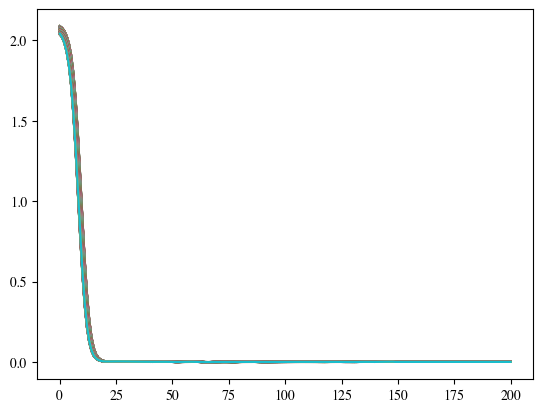

In [108]:
for i in range(rays['hr'].shape[0]):
    plt.plot(rs, rays['hr'][i])

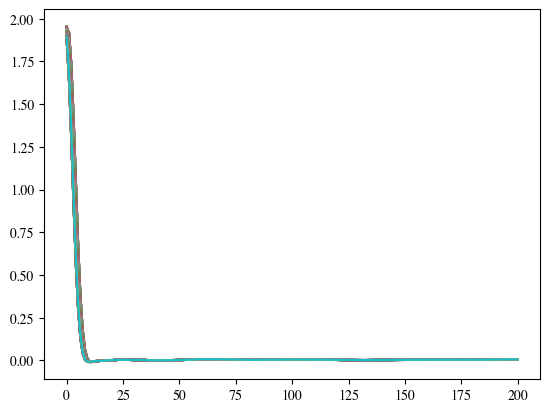

In [109]:
for i in range(rays['lr'].shape[0]):
    plt.plot(rs, rays['lr'][i])

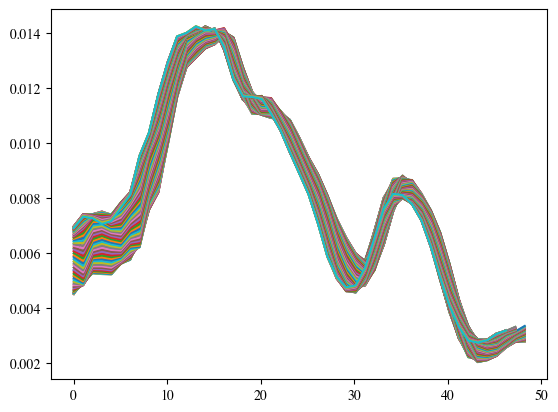

In [110]:
for i in range(rays['csm'].shape[0]):
    plt.plot(rs, rays['csm'][i])

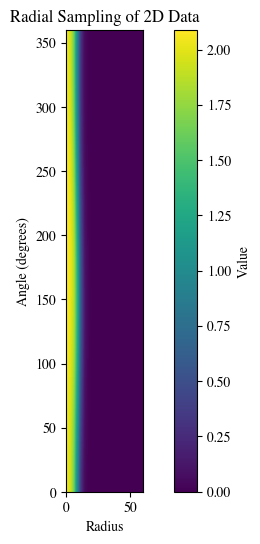

In [103]:
plt.figure(figsize=(8, 6))
plt.imshow(rays['hr'],  cmap='viridis',
          extent=(0, 200, 0, 360))
plt.xlabel('Radius')
plt.xlim(0,60)
plt.ylabel('Angle (degrees)')
plt.title('Radial Sampling of 2D Data')
plt.colorbar(label='Value')
plt.show()

# Next Steps

/Users/iman/Documents/cuny_ms/csm_pipeline/everything.py:284: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


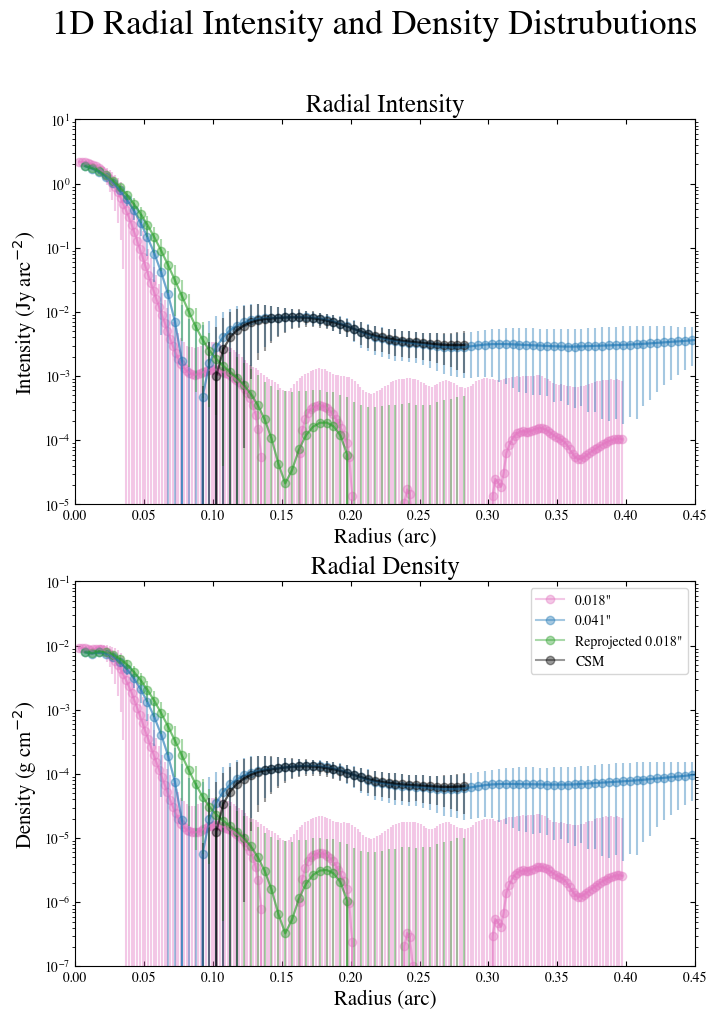

In [6]:
plot_1d(data_1d3, data_dens_1d3,info3,radius3,ax1_ymin=1e-5,ax1_ymax=1e1,ax2_ymin=1e-7,ax2_ymax=1e-1, 
        suptitle = "1D Radial Intensity and Density Distrubutions")

In [7]:
print("hr: ",np.nanmax(data_dens_1d3['hr']))
print("lr: ",np.nanmax(data_dens_1d3['lr']))
print("reproj: ",np.nanmax(data_dens_1d3['reproj']))
print("csm: ",np.nanmax(data_dens_1d3['csm']))

hr:  0.009254187779894767 g / cm2
lr:  0.00786872949798627 g / cm2
reproj:  0.008077289985025526 g / cm2
csm:  0.0001319119209338921 g / cm2


In [9]:
from dens import kappa
from astropy.modeling.models import BlackBody

## Abel Transform

In [10]:
from abel import all_abel, do_abel, plot_1d_abel

In [11]:
d = {'hr': data_1d3['hr'], 'lr': data_1d3['lr'], 'reproj': data_1d3['reproj'],"csm": data_1d3['csm']}
i = {'hr': info3['hr'], 'lr': info3['lr'], 'reproj': info3['reproj'],"csm": info3['csm']}

In [12]:
abels = all_abel(d,radius3,i)

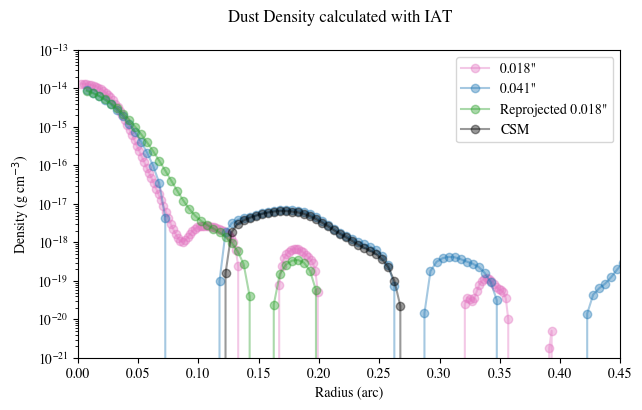

In [14]:
plot_1d_abel(abels,info3,radius3,ax_ymin=1e-21,ax_ymax=1e-13, suptitle = "Dust Density calculated with IAT")


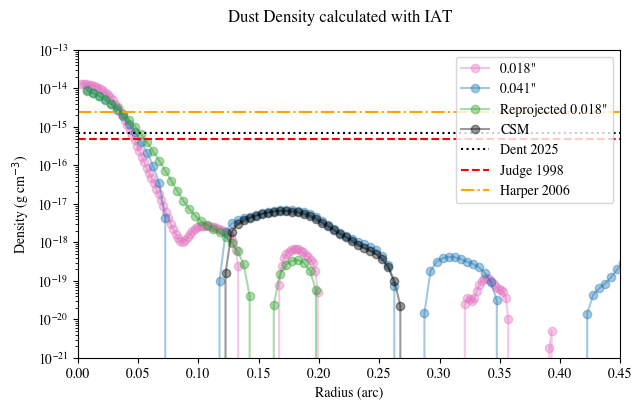

In [15]:
plot_1d_abel(abels,info3,radius3,ax_ymin=1e-21,ax_ymax=1e-13, suptitle = "Dust Density calculated with IAT" ,dent = True)


In [18]:
# H density from Dent et al via webplotdigitizer
data = np.asarray([[1.0801033591731268, 13.018018018018019],
[1.0904392764857884, 12.729729729729732],
[1.103359173126615, 12.423423423423424],
[1.1136950904392768, 12.202702702702704],
[1.245478036175711, 11.774774774774775],
[1.3695090439276487, 11.378378378378379],
[1.4935400516795867, 10.99099099099099],
[1.5813953488372094, 10.702702702702704],
[1.6950904392764858, 10.405405405405405],
[1.7777777777777781, 10.18018018018018],
[1.9069767441860466, 9.99099099099099],
[2.1059431524547803, 9.774774774774775],
[2.30749354005168, 9.608108108108109],
[2.524547803617571, 9.463963963963964],
[2.739018087855297, 9.337837837837839],
[2.9586563307493536, 9.22972972972973],
[3.152454780361757, 9.13963963963964],
[3.4263565891472867, 9.031531531531531],
[3.648578811369509, 8.945945945945946],
[3.8656330749354, 8.873873873873872],
[4.118863049095607, 8.797297297297298],
[4.3824289405684755, 8.72072072072072],
[4.671834625322997, 8.644144144144143],
[4.89405684754522, 8.59009009009009],]).T

xaxis = data[0]*21.5/1000
yaxis = 10**data[1] * 1.6735575e-24 * (1/0.7)

In [19]:
def plot_1d_abel_distribution_rstar(data_abel_1d,info,radius,ax_ymin=1e-2, ax_ymax=1e4,xmin=0,xmax=13, suptitle = "1D Abel Transformation (g/cm3)", dent=False):
    '''
    plot 1d density and intensity functions.
    can select plot x and y limits. default values inputted otherwise
    '''


    plt.rcParams["font.family"] = "times"
    fig, ax = plt.subplots(1, 1, figsize = [7,4])
    fig.suptitle(suptitle)

    title = ['hr','lr','reproj','csm']
    labels = ['{res}"'.format(res = np.round(info['hr']['kspatres'],3)),
             '{res}"'.format(res = np.round(info['lr']['kspatres'],3)),
               'Reprojected {res}"'.format(res = np.round(info['hr']['kspatres'],3)),
                 "CSM"]    
    
    color = ['C6','C0','C2','black']

    for j in range(len(title)):
        print(len(radius[title[j]]['arc_1d'][:len(data_abel_1d[title[j]])]))
        print((data_abel_1d[title[j]]*430).shape)
        ax.fill_between(radius[title[j]]['arc_1d'][:len(data_abel_1d[title[j]])]/0.0295,data_abel_1d[title[j]]+data_abel_1d[title[j]]*430,data_abel_1d[title[j]]+data_abel_1d[title[j]]*1000,alpha=0.4, label = labels[j], color = color[j])
        #ax.plot(radius[title[j]]['arc_1d'][:len(data_abel_1d[title[j]])],data_abel_1d[title[j]]*200,'o-',alpha=0.4, label = labels[j], c = color[j])
            #ax.errorbar(radius[title[c]]['arc_1d'],data_1d[title[c]].value,yerr=info[title[c]]['error'].value, c = color[c])

    

    if(dent == True):
         plt.plot(xaxis/0.0215,yaxis, label = ("Dent et al 2025"),color = 'black')


    ax.axvline(x=1, c = 'red', label = 'R_star = 1', ls = 'dashed')

    ax.legend(loc = 'best', bbox_to_anchor=(0.5, 0.5, 0.5, 0.5))
    ax.set_xlim(xmin,xmax)
    #ax.set_xlim(0,0.45)
    ax.set_ylim(ax_ymin, ax_ymax)
    ax.set_ylim(ax_ymin, ax_ymax)

    ax.semilogy()
#     ax.set_title("1-D Density (g/cm3)")
    ax.set_xlabel(r'Radius [$R_{*}$]')
    ax.set_ylabel(r'Density [g cm$^{-3}$]')


198
(198,)
198
(198,)
55
(55,)
55
(55,)


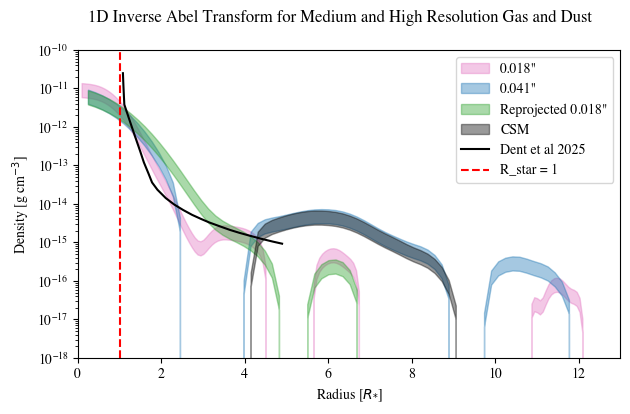

In [20]:
plot_1d_abel_distribution_rstar(abels,info3,radius3,ax_ymin=1e-18,ax_ymax=1e-10, suptitle = "1D Inverse Abel Transform for Medium and High Resolution Gas and Dust" ,dent = True)